# Домашнее задание № 10

# Поиск выбросов и генерация новых признаков

In [65]:
# загрузим базовые библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

1. Получение данных

In [66]:
# подключаемся к Glass Classification
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/glass")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/glass/versions/1


In [67]:
# считываем данные
path = '/root/.cache/kagglehub/datasets/uciml/glass/versions/1/glass.csv'
df = pd.read_csv(path)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# посмотрим размер
df.shape

(214, 10)

Целевая переменная – тип стекла 'Type'. Остальные признаки описывают химические элементы в составе материала.

In [11]:
# целевая переменная
target = 'Type'
# посмотрим сколько у нас классов
df[target].unique()

array([1, 2, 3, 5, 6, 7])

2. Первичный анализ

In [10]:
# количество уникальных значений
df.nunique()

,0
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


In [22]:
# проверим на пропуски
df[df.isna().any(axis=1)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [24]:
# и вот так
df.isnull().values.any()

False

3. Разделим выборку на обучающую и тестовую

In [14]:
# разобъем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2, random_state=42
                                                    )

Обучим модель на RandomForestClassifier() на не обработанных данных

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

подберем лучшие параметры

In [78]:
n_samples = df.shape[0]
n_features = df.shape[1]

RFC_param_grid = {'n_estimators': [20,50,100],
                  'max_depth': [None, 2, 5,],
                  'min_samples_split': [2, 0.5, n_samples//2,],
                  'min_samples_leaf': [1, 0.5, n_samples//2,],
                  'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2],
                  'bootstrap':[True, False],
                 }

In [79]:
rf_classifier_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                                  param_grid=RFC_param_grid,
                                  n_jobs=-1,
                                  cv=3,
                                  verbose=1,
                                  refit=True    # для получения лучшей функции
                                 )
rf_classifier_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1134 candidates, totalling 3402 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 3402.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 2, 5],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 5],
                         'min_samples_leaf': [1, 0.5, 107],
                         'min_samples_split': [2, 0.5, 107],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [80]:
# посмотрим на оптимальные параметры
rf_classifier_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [81]:
# Получим нашу лучшую модель
model_best_RFC = rf_classifier_grid.best_estimator_
model_best_RFC

RandomForestClassifier(max_features=0.3, n_estimators=50, random_state=42)

5. Получим предсказания и отчет о классификации

In [82]:
# получим предсказания
y_pred = model_best_RFC.predict(X_test)

In [83]:
# вычислим точность модели
model_best_RFC.score(X_test, y_test)

0.8372093023255814

In [84]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.86      0.84      0.83        43



Ради интереса посмотрим, что нам добавит BaggingClassifier() на не обработанной выборке

In [85]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
n_samples = df.shape[0]
n_features = df.shape[1]

BC_param_grid = {
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 'n_estimators': [5, 10, 15],  # количество деревьев, которые будут использоваться в ансамбле.
                 'max_samples' : [0.6, 0.8, 1.0],
                 'max_features' : [0.6, 0.8, 1.0],
                 'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2]
                }

In [97]:
bc_classifier_grid = GridSearchCV(BaggingClassifier(estimator=RandomForestClassifier(random_state=42)),
                                  param_grid=BC_param_grid,
                                  n_jobs=-1,  # используем все доступные процессоры
                                              # по умолчанию None (1 задание)
                                  cv=5,       # количество разрезов кросс-валидации
                                              # по умолчанию cv=5
                                  refit=True  # для получения лучшей функции
                                 )
bc_classifier_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/va

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 5],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15]})

Даже для такого маленького датасета считаем ну очень долго

In [99]:
# посмотрим на оптимальные параметры
bc_classifier_grid.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 5,
 'max_samples': 1.0,
 'n_estimators': 10}

In [100]:
# Сохраним нашу лучшую модель
model_best_BC = bc_classifier_grid.best_estimator_
model_best_BC

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=RandomForestClassifier(random_state=42),
                  max_features=5)

In [101]:
# получаем предсказания
y_pred = model_best_BC.predict(X_test)

In [102]:
# вычислим точность модели
model_best_BC.score(X_test, y_test)

0.813953488372093

In [103]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.91      0.71      0.80        14
           3       1.00      0.33      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.81        43
   macro avg       0.90      0.74      0.78        43
weighted avg       0.85      0.81      0.80        43



Точность намного хуже. Думаю это объясняется малым количеством исходных данных

6. Обработка выбросов

а) визуализация

Рассмотрим наши выбросы

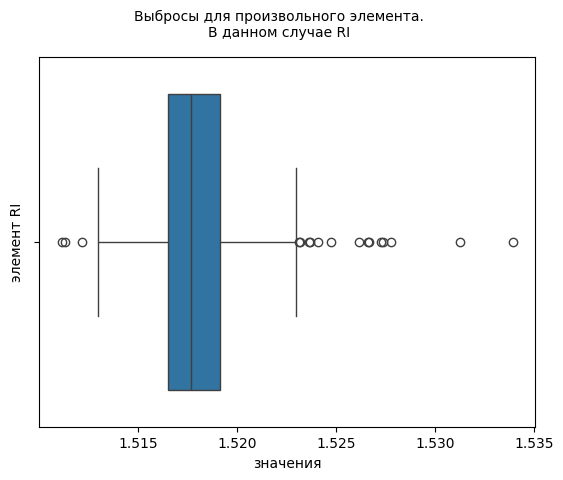

In [70]:
# посмотрим выбросы для произвольного элеметна
sns.boxplot(x=df['RI'])
plt.xlabel('значения', fontsize=10)
plt.ylabel('элемент RI', fontsize=10)
plt.suptitle('Выбросы для произвольного элемента.\nВ данном случае RI', fontsize=10)
plt.show()

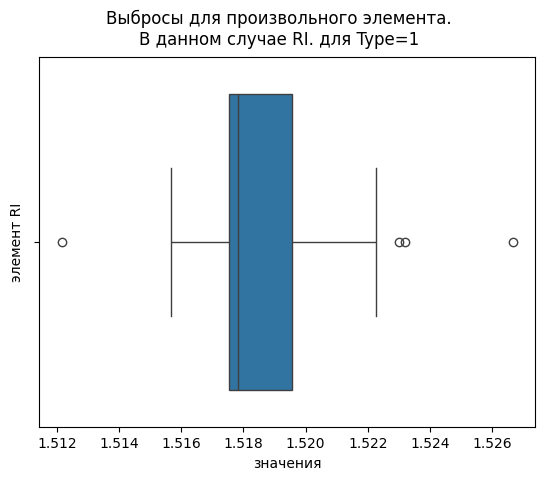

In [71]:
# тот же элемент в разрезе Type
sns.boxplot(x=df['RI'].loc[df['Type'] == 1])
plt.xlabel('значения', fontsize=10)
plt.ylabel('элемент RI', fontsize=10)
plt.suptitle('Выбросы для произвольного элемента.\nВ данном случае RI. для Type=1')
plt.show()

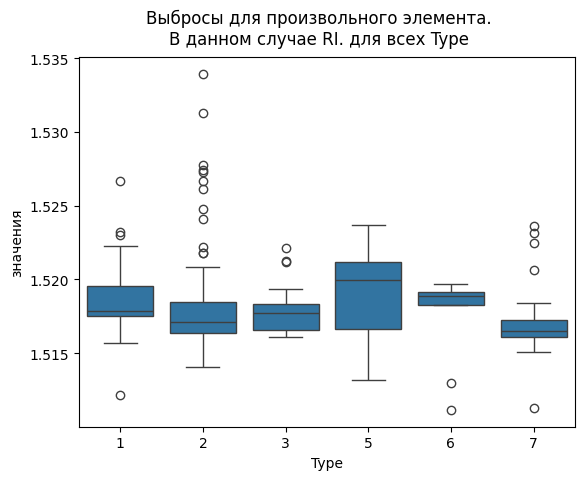

In [72]:
# тот же элемент в разрезе всех значений Type
sns.boxplot(data=df, x=df['Type'], y=df['RI'])
plt.xlabel('Type', fontsize=10)
plt.ylabel('значения', fontsize=10)
plt.suptitle('Выбросы для произвольного элемента.\nВ данном случае RI. для всех Type')
plt.show()

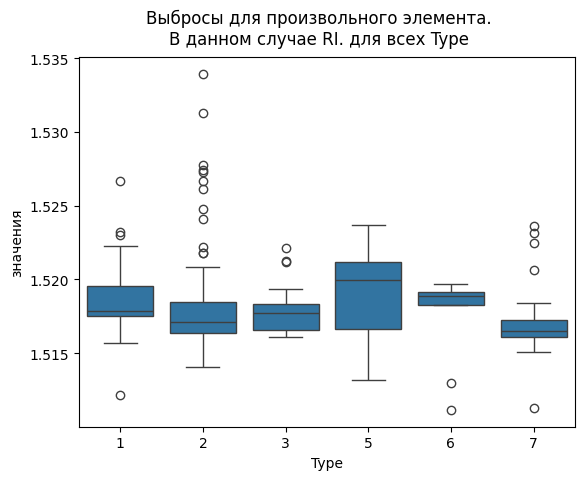

In [177]:
# тот же элемент в разрезе всех значений Type
sns.boxplot(data=df, x=df['Type'], y=df['RI'])
plt.xlabel('Type', fontsize=10)
plt.ylabel('значения', fontsize=10)
plt.suptitle('Выбросы для произвольного элемента.\nВ данном случае RI. для всех Type')
plt.show()

In [180]:
# визуализация выбросов всех элементов
def visual(data=df, title='Выбросы для всех элементов'):

    cols=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
    # tmp = pd.DataFrame(data=df, columns=cols)
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=pd.melt(pd.DataFrame(data=data, columns=cols)), x='value', y='variable')
    plt.xlabel('значения', fontsize=10)
    plt.ylabel('элементы', fontsize=10)
    plt.suptitle(title)
    plt.show()

    return

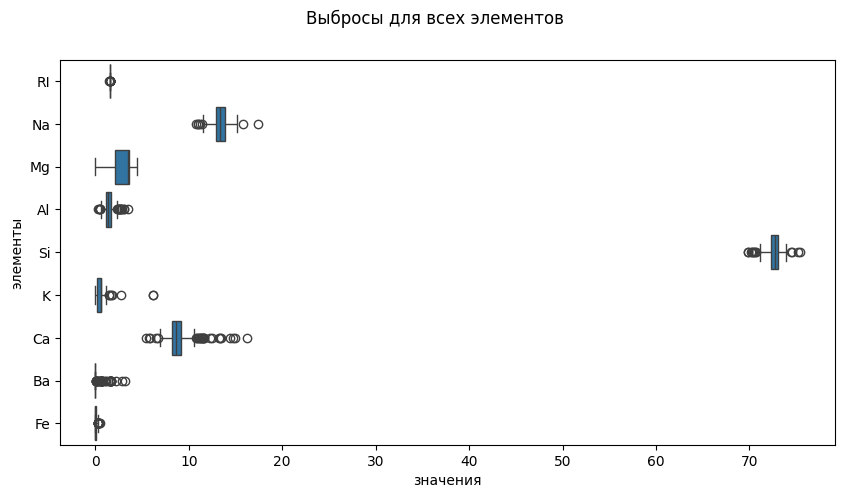

In [181]:
# визуализация выбросов всех элементов
visual()

Ну и наконец соберем все вместе и немного раскрасим)

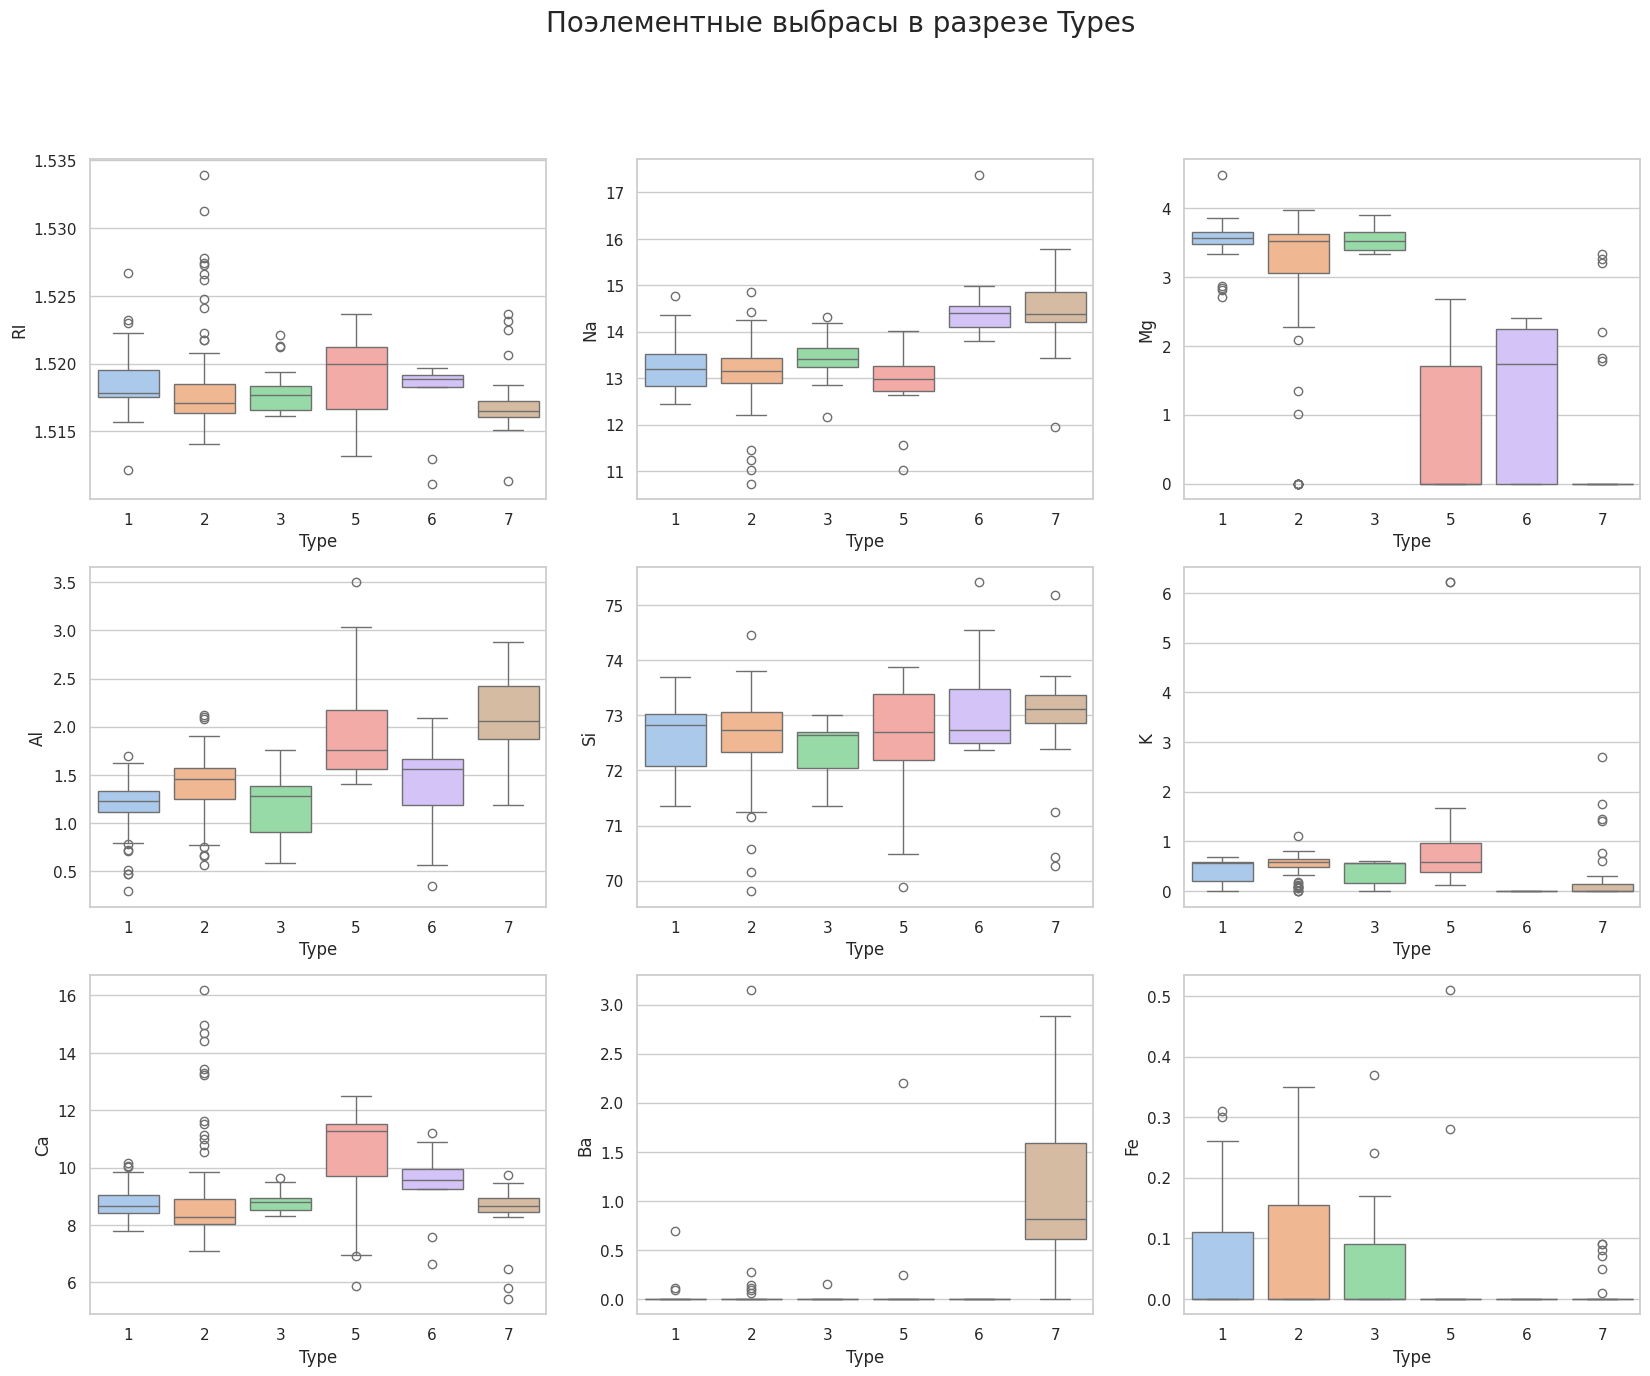

In [167]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.boxplot(ax=axes[0, 0], data=df, x=df['Type'], y=df['RI'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[0, 1], data=df, x=df['Type'], y=df['Na'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[0, 2], data=df, x=df['Type'], y=df['Mg'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[1, 0], data=df, x=df['Type'], y=df['Al'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[1, 1], data=df, x=df['Type'], y=df['Si'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[1, 2], data=df, x=df['Type'], y=df['K'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[2, 0], data=df, x=df['Type'], y=df['Ca'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[2, 1], data=df, x=df['Type'], y=df['Ba'], hue=df['Type'], legend=False, palette='pastel')
sns.boxplot(ax=axes[2, 2], data=df, x=df['Type'], y=df['Fe'], hue=df['Type'], legend=False, palette='pastel')
plt.suptitle('Поэлементные выбрасы в разрезе Types', fontsize=20)
plt.show()


Можно, конечно, и так все представлять.

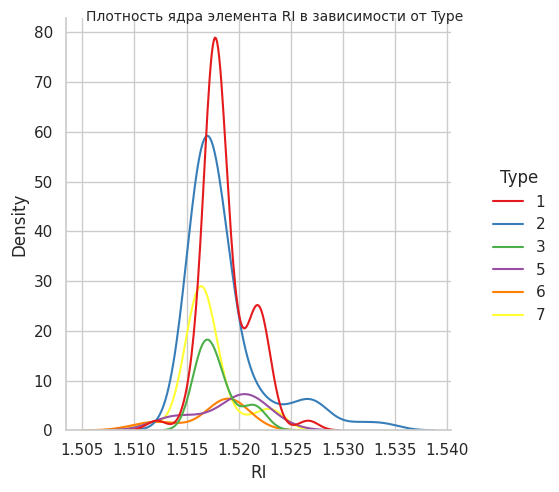

In [172]:
sns.displot(data=df, x='RI', hue='Type', kind='kde', palette = 'Set1')
plt.suptitle('Плотность ядра элемента RI в зависимости от Type', fontsize=10)
plt.show()

Выглядит все красиво, но на sns.boxplot все понятнее

Обнаружение аномалий с оценками.

Подгонка модели к данным

Применим KernelDensity оценщик к нашему набору данных, используя метод fit(), а затем используем его для обнаружения выбросов.

In [68]:
from sklearn.neighbors import KernelDensity

In [69]:
# Оценим плотность с помощью оценки плотности ядра Гаусса
kde = KernelDensity(kernel='gaussian')
kde.fit(X)

KernelDensity()

In [154]:
# попробуем тут что-нибудь настроить
KernelDensity(algorithm='auto',     # алгоритм для оценки плотности ядра
                                    # значения: auto (по умолчанию), kd_tree, ball_tre
              atol=0,               # желаемый абсолютный допуск результата
                                    # по умолчанию 0
              bandwidth=1.0,        # контролирует ширину ядра и определяет,
                                    # насколько гладкой будет кривая оценённой плотности
              breadth_first=True,   # подход для решения задачи
                                    # True (по умолчанию) - поиск в ширину (breadth-first),
                                    # в противном случае — поиск в глубину (depth-first)
                                    # Поиск в ширину обычно быстрее для компактных ядер
                                    # и/или высоких допусков
              kernel='gaussian',    # ядерная функция для оценки плотности в каждой точке данных
                                    # например: 'gaussian', 'tophat', 'epanechnikov',
                                    # 'exponential', 'linear', 'cosine'
              leaf_size=10,         # размер листьев базового дерева. По умолчанию 40
              metric='euclidean',   # оценка метрики
              metric_params=None,   # параметры метрики для вычисления расстояний
              rtol=0                # желаемый относительный допуск результата
             )

KernelDensity(leaf_size=10)

В оценке KernelDensity есть метод под названием score_samples(), который принимает набор данных и возвращает оценки логарифмической плотности для каждой выборки данных. Мы разделим эти значения на 95% допустимых данных и 5% выбросов на основе результатов функции score_samples() .

In [124]:
# получим наши парамеры для дальнейшей работы
X = df.drop(columns=target)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [155]:
kde_X = kde.score_samples(X)
kde_X[:5]   # содержит логарифмическую вероятность данных.
            # Чем меньше значение, тем реже встречается выборка

array([-9.95564478, -9.40499186, -9.30135219, -9.04602875, -9.11558438])

In [164]:
# Разделим набор данных на допустимые выборки и выбросы
from scipy.stats.mstats import mquantiles

# alpha_set = 0.95
alpha_set = 0.87
tau_kde = mquantiles(kde_X, 1. - alpha_set)
tau_kde

array([-12.12281529])

Все значения в массиве kde_X, которые меньше tau_kde, будут выбросами, а значения, которые больше, будут считаться допустимыми выборками. Найдем индексы выбросов и допустимых выборок. Используем эти индексы для фильтрации данных, чтобы разделить их на выбросы и допустимые выборки.

In [165]:
# найдем индексы, удовлетворяющие условию
outliers = np.argwhere(kde_X < tau_kde)
# свернем в 1 измерение
outliers = outliers.flatten()
outliers

array([103, 105, 106, 107, 108, 109, 110, 111, 112, 131, 163, 165, 166,
       167, 168, 170, 171, 172, 173, 180, 183, 184, 185, 186, 188, 189,
       201, 207])

In [166]:
# найдем выбросы
X_outliers = df.iloc[outliers]
X_outliers.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2


In [167]:
# найдем все "правильные" значения
normal_samples = np.argwhere(kde_X >= tau_kde)
normal_samples = normal_samples.flatten()
X_valid = df.iloc[normal_samples]
X_valid.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [168]:
# построим мини-отчетик о проделанной работе
print('Всего строк данных : ',X.shape[0])
print('Строк данных с выбросами : ', len(outliers))
print('Строк данных без выбросов : ', len(normal_samples))

Всего строк данных :  214
Строк данных с выбросами :  28
Строк данных без выбросов :  186


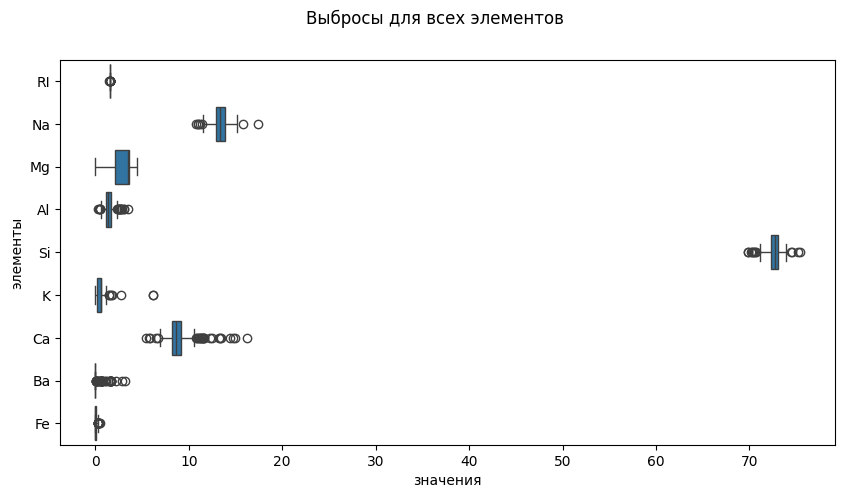

In [182]:
# визуализация выбросов всех элементов
visual(df)

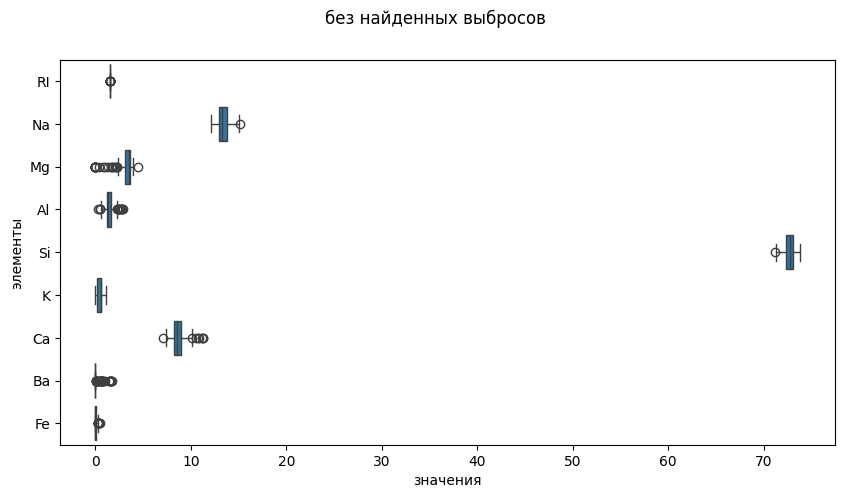

In [184]:
# без найденных выбросов
visual(data=X_valid, title='без найденных выбросов')

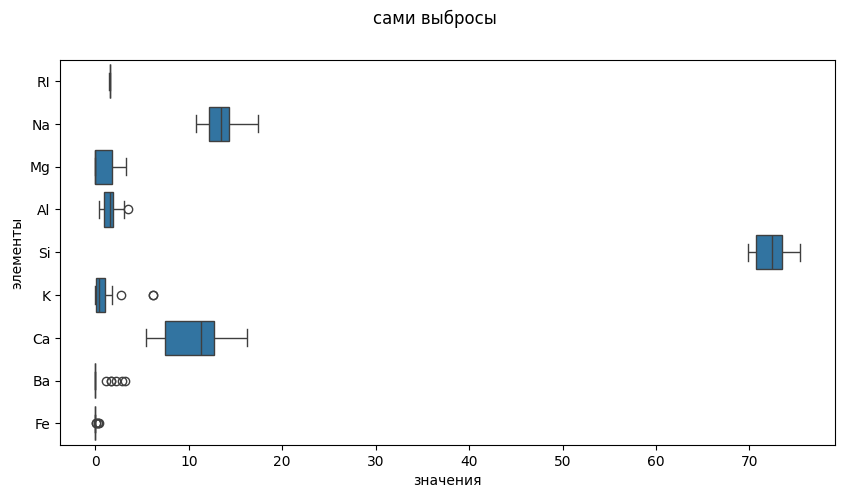

In [185]:
# сами выбросы
visual(data=X_outliers, title='сами выбросы')

Уже получше. Идем дальше

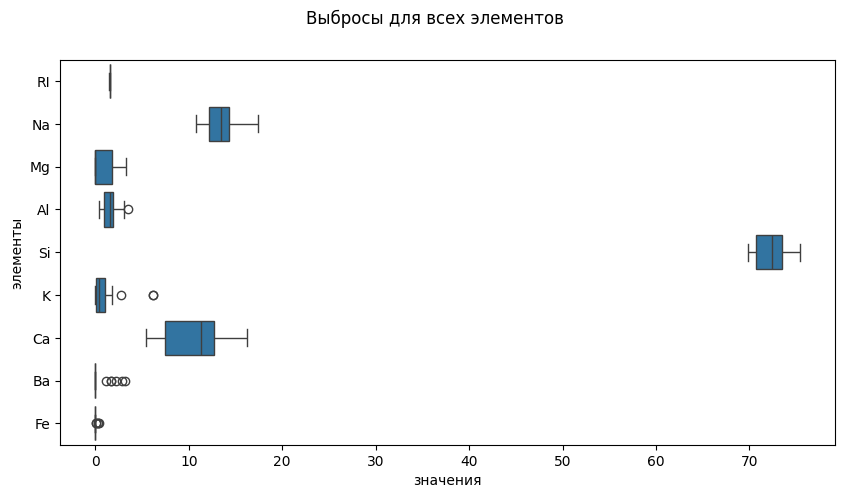

In [171]:
# визуализация выбросов всех элементов
cols=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
# tmp = pd.DataFrame(data=df, columns=cols)
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.melt(pd.DataFrame(data=X_outliers, columns=cols)), x='value', y='variable')
plt.xlabel('значения', fontsize=10)
plt.ylabel('элементы', fontsize=10)
plt.suptitle('Выбросы для всех элементов')
plt.show()

In [83]:
X_outliers.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5


Чисто по арифметике все сходится!

Определим модель с помощью класса LocalOutlierFactor. Зададим количество оценок и значение загрязнения в аргументах. Загрязнение определяет долю выбросов в наборе данных.



In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where

In [31]:
# создадим оценщика
estimator = LocalOutlierFactor(n_neighbors=5,
                               contamination=0.1)
estimator

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

In [32]:
# получим оценку выбросов
outlier_scores = estimator.negative_outlier_factor_
outlier_scores

AttributeError: 'LocalOutlierFactor' object has no attribute 'negative_outlier_factor_'

In [16]:
# получим наши парамеры для дальнейшей работы
X = df.drop(columns=target)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [17]:
# получим прогнозные данные с помощью метода fit_predict()
y_pred = lof.fit_predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [21]:
# извлекем отрицательные выходные данные в качестве выбросов
lofs_index = where(y_pred==-1)
lofs_index

(array([ 84, 163, 171, 172, 180, 185, 186]),)

In [25]:
X[83]

KeyError: 83

In [23]:
values = X[lofs_index]

InvalidIndexError: (array([ 84, 163, 171, 172, 180, 185, 186]),)

In [177]:
# обучим модель на тестовых данных
model_LOF.fit_predict(X_test)
model_LOF

LocalOutlierFactor()

In [181]:
# получим оценки
lof = model_LOF.negative_outlier_factor_
lof

array([-0.99131656, -1.56454909, -1.11208231, -1.57354073, -1.02662931,
       -2.85745959, -0.99297428, -0.99242929, -0.99140001, -1.00472284,
       -1.52603236, -1.59651479, -0.9879343 , -0.9868046 , -1.26516873,
       -1.56458288, -1.36724922, -1.02069895, -0.98539237, -2.47900329,
       -0.98786121, -1.57309355, -1.65111407, -1.55005829, -0.98499345,
       -1.64709192, -0.99726752, -1.00068134, -1.49728927, -0.99664463,
       -1.03659061, -0.99677191, -0.98682995, -0.9849901 , -1.23243577,
       -1.7565167 , -3.3565204 , -0.9859377 , -1.01039739, -1.31555785,
       -1.01921304, -1.62126383, -0.97745382])

In [186]:
thresh = quantile(lof, .03)
print(thresh)

-2.7590609535934094


In [190]:
index = where(lof<=thresh)
values = X_test[index]

InvalidIndexError: (array([ 5, 36]),)